In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
data=fetch_california_housing(as_frame=True)
df=data.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df=df[df['MedHouseVal']<5]

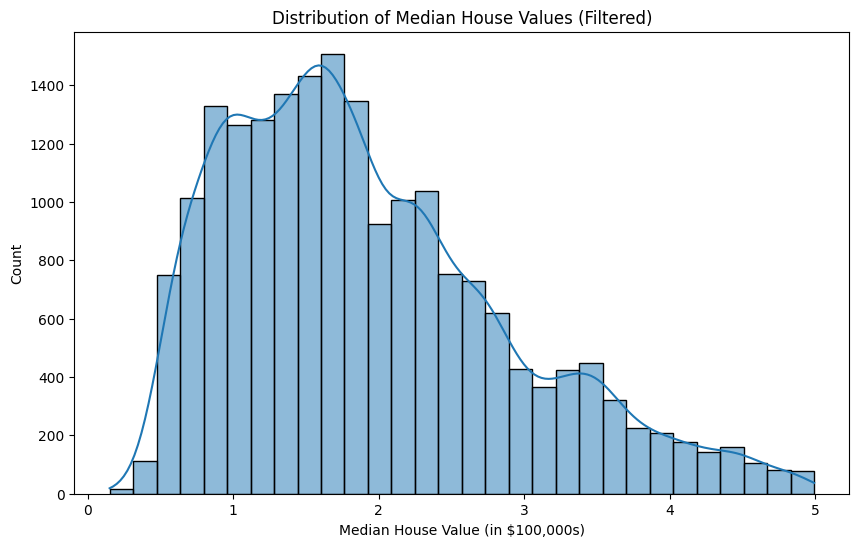

In [5]:
# Let's check the new distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Values (Filtered)')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Count')
plt.show()

In [6]:
X=df.drop('MedHouseVal',axis=1  )
Y=df['MedHouseVal']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop('MedHouseVal',axis=1  )
Y=df['MedHouseVal']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)


KNeighborsRegressor()

In [17]:
y_pred=knn.predict(x_test)

In [18]:
y_pred

array([2.939 , 3.008 , 2.167 , ..., 1.1406, 1.6932, 2.002 ], shape=(3930,))

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("KNN Model Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R²:   {r2:.3f}")


KNN Model Performance:
RMSE: 0.581
MAE:  0.415
R²:   0.648
